# **Import libraries**

In [63]:
# !pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
sns.set_palette('viridis')
sns.color_palette(palette='viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

# **Load Datasets**

[Dataset for Classifying Tasks](https://www.kaggle.com/datasets/kukuroo3/body-performance-data)

[Dataset for Regression Tasks](https://www.kaggle.com/datasets/sanjeetsinghnaik/used-car-information)

In [5]:
df_clf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "kukuroo3/body-performance-data",
  "bodyPerformance.csv"
)
df_rgr = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sanjeetsinghnaik/used-car-information",
  "UsedCars_Combined.csv"
)

100%|██████████| 744k/744k [00:00<00:00, 4.21MB/s]


100%|██████████| 149k/149k [00:00<00:00, 1.94MB/s]


# **Analyse Datasets**

## Classifier Dataset

Based on some parameters, I need to classify the sportsmen.

In [6]:
df_clf.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.00,M,172.30,75.24,21.30,80.00,130.00,54.90,18.40,60.00,217.00,C
1,25.00,M,165.00,55.80,15.70,77.00,126.00,36.40,16.30,53.00,229.00,A
2,31.00,M,179.60,78.00,20.10,92.00,152.00,44.80,12.00,49.00,181.00,C
3,32.00,M,174.50,71.10,18.40,76.00,147.00,41.40,15.20,53.00,219.00,B
4,28.00,M,173.80,67.70,17.10,70.00,127.00,43.50,27.10,45.00,217.00,B


In [7]:
df_clf.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,"13,393.00","13,393.00","13,393.00","13,393.00","13,393.00","13,393.00","13,393.00","13,393.00","13,393.00","13,393.00"
mean,36.78,168.56,67.45,23.24,78.80,130.23,36.96,15.21,39.77,190.13
std,13.63,8.43,11.95,7.26,10.74,14.71,10.62,8.46,14.28,39.87
min,21.00,125.00,26.30,3.00,0.00,0.00,0.00,-25.00,0.00,0.00
25%,25.00,162.40,58.20,18.00,71.00,120.00,27.50,10.90,30.00,162.00
50%,32.00,169.20,67.40,22.80,79.00,130.00,37.90,16.20,41.00,193.00
75%,48.00,174.80,75.30,28.00,86.00,141.00,45.20,20.70,50.00,221.00
max,64.00,193.80,138.10,78.40,156.20,201.00,70.50,213.00,80.00,303.00


## Regression Dataset

Even though this dataset is first designed for classifying tasks, I'll use it to predict the price of the car - I just don't have any alternatives.

In [8]:
df_rgr.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city
0,0,2016,Honda,Honda Brio S MT,Brio,"425,000.00","9,680.00",Petrol,Mumbai
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,"325,000.00","119,120.00",Diesel,Mumbai
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,"2,650,000.00","64,593.00",Diesel,Thane
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,"4,195,000.00","25,000.00",Diesel,Mumbai
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,"475,000.00","23,800.00",Diesel,Mumbai


In [9]:
df_rgr.describe()

,Id,year,price,distance_travelled(kms)
count,"1,725.00","1,725.00","1,725.00","1,725.00"
mean,862.00,"2,015.39","1,494,837.39","53,848.26"
std,498.11,3.21,"1,671,657.73","44,725.54"
min,0.00,"1,990.00","62,500.00",350.00
25%,431.00,"2,013.00","545,000.00","29,000.00"
50%,862.00,"2,016.00","875,000.00","49,000.00"
75%,"1,293.00","2,018.00","1,825,000.00","70,500.00"
max,"1,724.00","2,021.00","14,700,000.00","790,000.00"


# **Clean Datasets**

## Classifier Dataset

In [10]:
lbl_enc = LabelEncoder()

df_clf['gender'] = lbl_enc.fit_transform(df_clf['gender'])
df_clf['class'] = lbl_enc.fit_transform(df_clf['class'])

## Dataset Regressor

In [11]:
df_rgr.drop(['Id', 'full_model_name'], axis=1, inplace=True)

In [12]:
df_rgr['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Petrol + 1', 'CNG + 1', 'Hybrid'],
      dtype=object)

I'll replace Petrol + 1 with just Petrol in order not to have so many columns after OneHotEncoding.

In [13]:
df_rgr.replace('Petrol + 1', 'Petrol', inplace=True)
df_rgr.replace('CNG + 1', 'CNG', inplace=True)

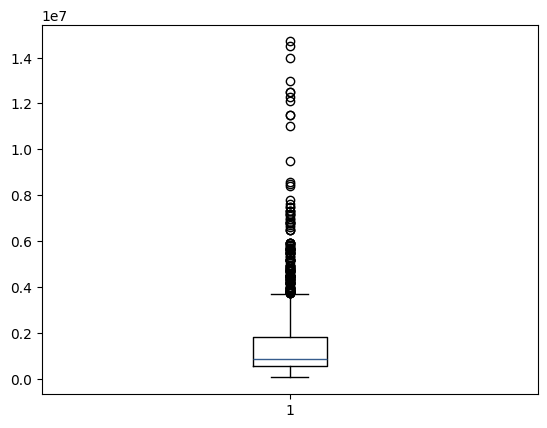

In [14]:
plt.boxplot(df_rgr['price'])
plt.show()

There are definitely some extra-expensive cars. (I tried to train models with them, byt they didn't like it, so I'll just drop them by IQR)

In [15]:
Q1 = df_rgr['price'].quantile(0.25)
Q3 = df_rgr['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_rgr = df_rgr[(df_rgr['price'] >= lower_bound) & (df_rgr['price'] <= upper_bound)]
df_rgr = df_rgr.reset_index(drop=True)

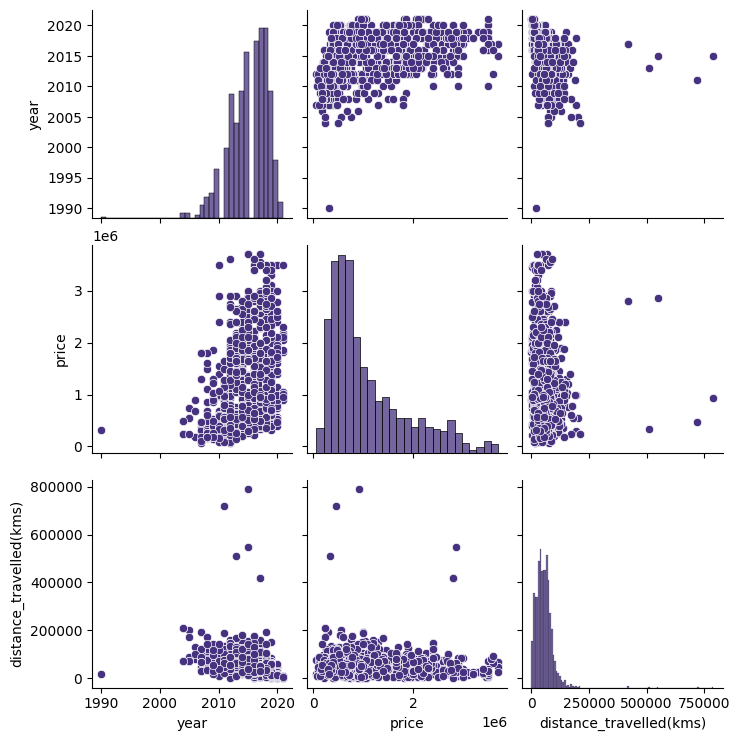

In [16]:
sns.pairplot(df_rgr)
plt.show()

Still, I think there are outliers in distance travelled, because having the circumference of the Earth ~40k kms, having the distance ~ 750k kms, it means they theoretically have encircled Earth 19 times(insane)

Also, there is one outlier with the year 1990, but it is possible, just the data is really rare in this dataset.

In [17]:
categorical_columns = ['fuel_type', 'city']

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df_rgr[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df_rgr, one_hot_df], axis=1)

df_rgr = df_encoded.drop(categorical_columns, axis=1)

# **Split Datasets**

In [18]:
X = df_clf.drop('class', axis=1)
y = df_clf['class']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X = df_rgr.drop(['price', 'model_name'], axis=1)
y = df_rgr['price']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

## Encode Dataset


In [20]:
encoder = TargetEncoder(cols=['brand'])

encoder.fit(X=X_train2, y=y_train2)

X_train2 = encoder.transform(X=X_train2, y=y_train2)
X_test2 = encoder.transform(X=X_test2, y=y_test2)

## Scale Datasets

I'll scale te dataset, overwise the performance will be really bad.

In [21]:
std_scaler = StandardScaler()

X_train1 = std_scaler.fit_transform(X_train1)
X_test1 = std_scaler.transform(X_test1)

X_train2 = std_scaler.fit_transform(X_train2)
X_test2 = std_scaler.transform(X_test2)

# **Hyperparameter tunning**

Let's kickstart witth hyperparameter tunning.

## **KNN Classifier**

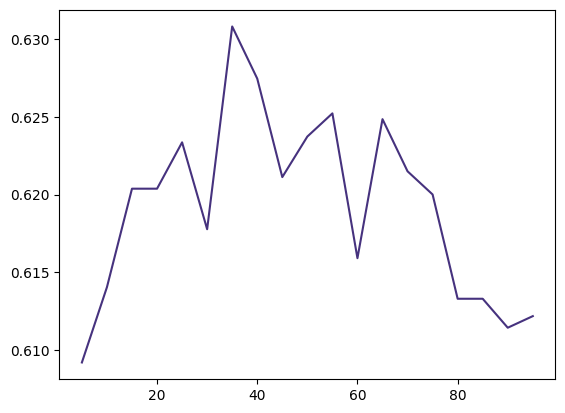

In [22]:
x = range(5, 100, 5)
y = []

for i in x:
  knn_clf = KNeighborsClassifier(n_neighbors=i)
  knn_clf.fit(X_train1, y_train1)
  y.append(knn_clf.score(X_test1, y_test1))

plt.plot(x, y)
plt.show()

In [23]:
x[y.index(max(y))]

35

The plot shows that the maximal accuracy is achieved when n_neighbours=35 => this may be normal, as it is certainly not overfitting(having 13k samples, it wouldd happen at around 500), and not really underfitting(with 1-20 neighbours). I would choose it/

## **KNN Regressor**

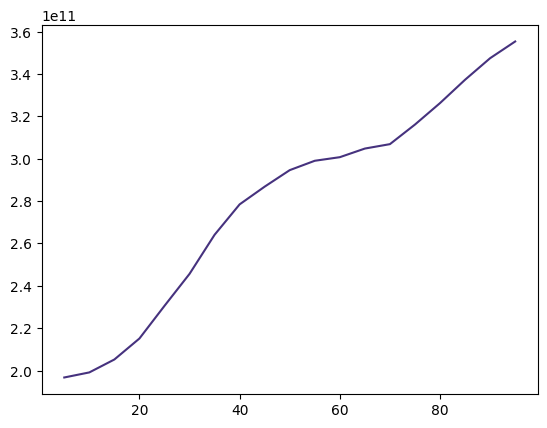

In [24]:
x = range(5, 100, 5)
y = []

for i in x:
  knn_clf = KNeighborsRegressor(n_neighbors=i)
  knn_clf.fit(X_train2, y_train2)
  y_pred = knn_clf.predict(X_test2)
  y.append(mean_squared_error(y_test2, y_pred))

plt.plot(x, y)
plt.show()

In [25]:
x[y.index(min(y))]

5

As we see, the MSE rises as the number of neighbours increases - that is predictable - the consequence of overfitting. Judging by how the line slope is increasing as the values >70, it may point to underfitting.

Actually, to avoing overfitting I would ratther choose 40 neighbours.

## **DecisionTreeClassifier**

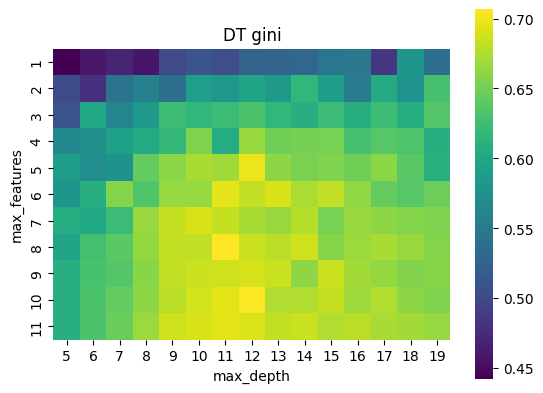

In [38]:
x = range(1, len(X_train1.T) + 1)
y = range(5, 20)
z = []

for i in x:
  z.append([])
  for j in y:
    dt = DecisionTreeClassifier(max_features=i, max_depth=j, criterion='gini', random_state=42)
    dt.fit(X_train1, y_train1)
    z[len(z) - 1].append(dt.score(X_test1, y_test1))

sns.heatmap(z, cmap='viridis', square=True, yticklabels=x, xticklabels=y)
plt.xlabel('max_depth')
plt.ylabel('max_features')
plt.title('DT gini')
plt.show()

In [39]:
arr = np.array(z)
idx = np.unravel_index(np.argmax(arr), arr.shape)

best_max_features = list(x)[idx[0]]
best_max_depth = list(y)[idx[1]]

print(best_max_features, best_max_depth)

8 11


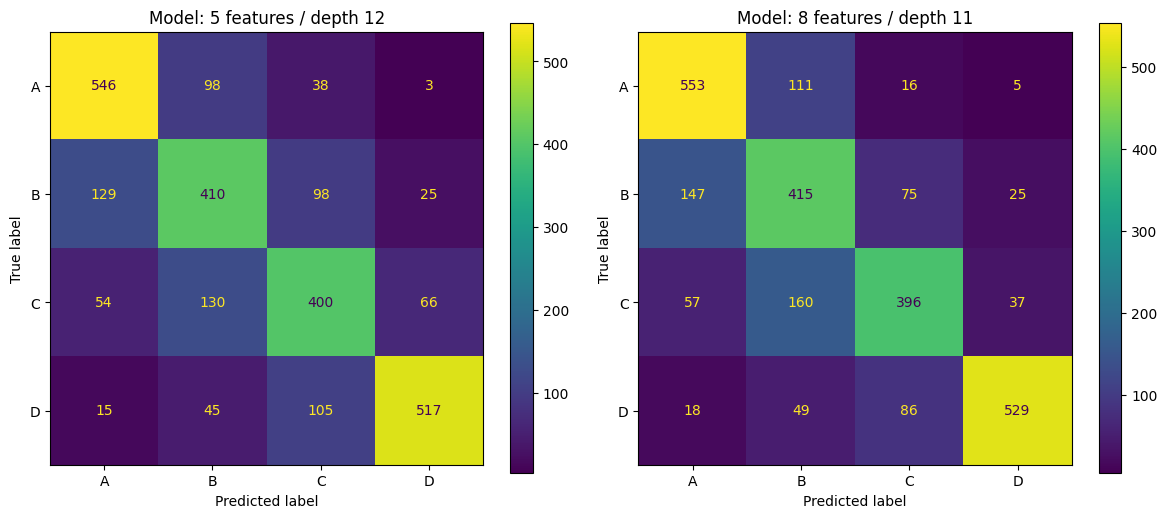

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt1 = DecisionTreeClassifier(max_features=5, max_depth=12, criterion='gini', random_state=42)
dt1.fit(X_train1, y_train1)
y_pred1 = dt1.predict(X_test1)

dt2 = DecisionTreeClassifier(max_features=8, max_depth=11, criterion='gini', random_state=42)
dt2.fit(X_train1, y_train1)
y_pred2 = dt2.predict(X_test1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm1 = confusion_matrix(y_test1, y_pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['A','B','C','D'])
disp1.plot(ax=axes[0], values_format='d')
axes[0].set_title("Model: 5 features / depth 12")

cm2 = confusion_matrix(y_test1, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['A','B','C','D'])
disp2.plot(ax=axes[1], values_format='d')
axes[1].set_title("Model: 8 features / depth 11")

plt.tight_layout()
plt.show()


As we see, the best results are achieved when there are 8 features and the depth is 11.

I would raher choose 5 features and depth 12, as it doesn't drop that much in performance, but it is a less complex model.

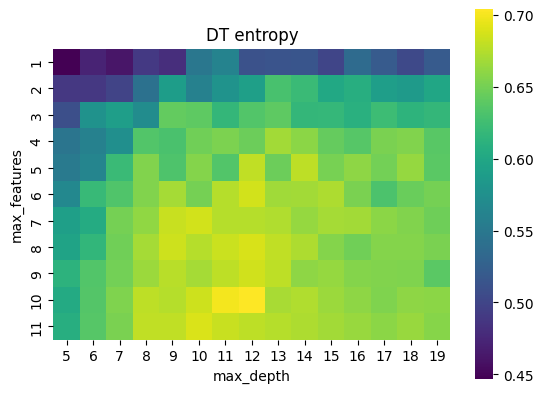

In [49]:
x = range(1, len(X_train1.T) + 1)
y = range(5, 20)
z = []

for i in x:
  z.append([])
  for j in y:
    dt = DecisionTreeClassifier(max_features=i, max_depth=j, criterion='entropy', random_state=42)
    dt.fit(X_train1, y_train1)
    z[len(z) - 1].append(dt.score(X_test1, y_test1))

sns.heatmap(z, cmap='viridis', square=True, yticklabels=x, xticklabels=y)
plt.xlabel('max_depth')
plt.ylabel('max_features')
plt.title('DT entropy')
plt.show()

In [50]:
arr = np.array(z)
idx = np.unravel_index(np.argmax(arr), arr.shape)

best_max_features = list(x)[idx[0]]
best_max_depth = list(y)[idx[1]]

print(best_max_features, best_max_depth)

10 12


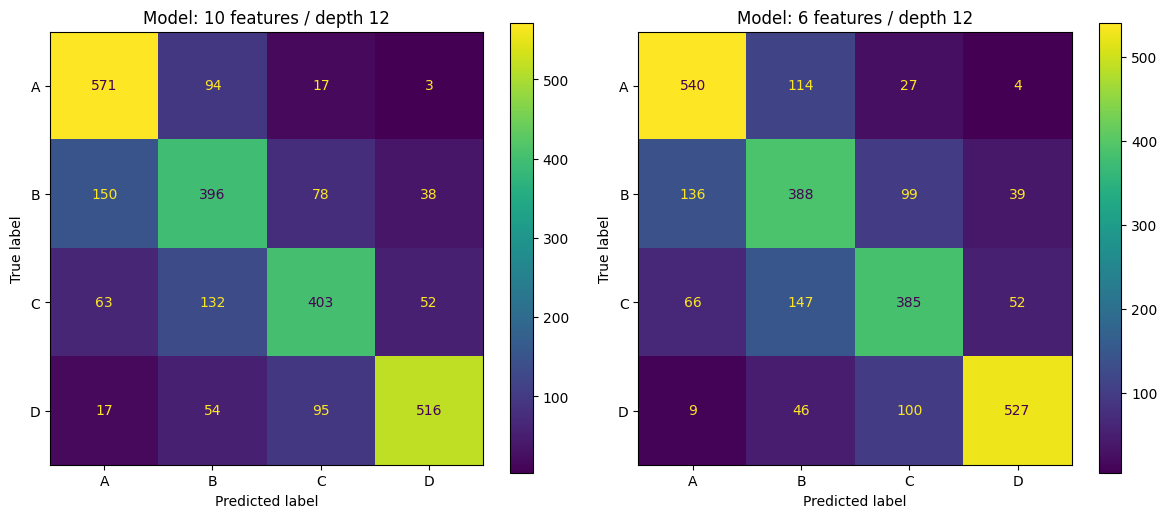

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt1 = DecisionTreeClassifier(max_features=10, max_depth=12, criterion='entropy', random_state=42)
dt1.fit(X_train1, y_train1)
y_pred1 = dt1.predict(X_test1)

dt2 = DecisionTreeClassifier(max_features=6, max_depth=12, criterion='entropy', random_state=42)
dt2.fit(X_train1, y_train1)
y_pred2 = dt2.predict(X_test1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm1 = confusion_matrix(y_test1, y_pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['A','B','C','D'])
disp1.plot(ax=axes[0], values_format='d')
axes[0].set_title("Model: 10 features / depth 12")

cm2 = confusion_matrix(y_test1, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['A','B','C','D'])
disp2.plot(ax=axes[1], values_format='d')
axes[1].set_title("Model: 6 features / depth 12")

plt.tight_layout()
plt.show()

Using entropy criterion for dividing the samples, we see that there are differences between the model with 6 and 10 features used. All besides D-A and D-D were worse with 6 features, but I'll still choose 10 features, as it is still much better.

The model with 10 features and 12 depth achieves the best results.



## **DecisionTreeRegressor**

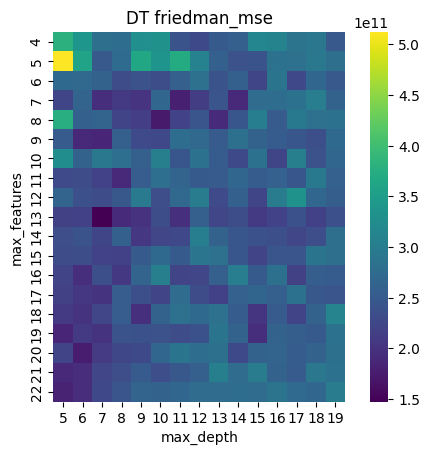

In [53]:
x = range(4, len(X_train2.T) + 1)
y = range(5, 20)
z = []

for i in x:
  z.append([])
  for j in y:
    dt = DecisionTreeRegressor(max_features=i, max_depth=j, criterion='friedman_mse', random_state=42)
    dt.fit(X_train2, y_train2)
    y_pred  = dt.predict(X_test2)
    z[len(z) - 1].append(mean_squared_error(y_pred, y_test2))

sns.heatmap(z, cmap='viridis', square=True, yticklabels=x, xticklabels=y)
plt.xlabel('max_depth')
plt.ylabel('max_features')
plt.title('DT friedman_mse')
plt.show()

In [54]:
arr = np.array(z)
idx = np.unravel_index(np.argmin(arr), arr.shape)

best_max_features = list(x)[idx[0]]
best_max_depth = list(y)[idx[1]]

print(best_max_features, best_max_depth)

13 7


Overall, the smallest MSE is achieved by the model using 13 features and the depth of 7 - not complex, so let it be.

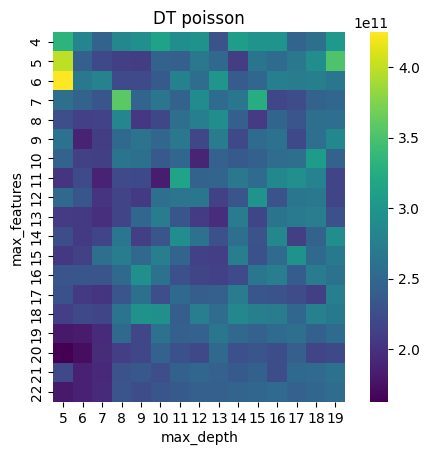

In [55]:
x = range(4, len(X_train2.T) + 1)
y = range(5, 20)
z = []

for i in x:
  z.append([])
  for j in y:
    dt = DecisionTreeRegressor(max_features=i, max_depth=j, criterion='poisson', random_state=42)
    dt.fit(X_train2, y_train2)
    y_pred  = dt.predict(X_test2)
    z[len(z) - 1].append(mean_squared_error(y_pred, y_test2))

sns.heatmap(z, cmap='viridis', square=True, yticklabels=x, xticklabels=y)
plt.xlabel('max_depth')
plt.ylabel('max_features')
plt.title('DT poisson')
plt.show()

In [56]:
arr = np.array(z)
idx = np.unravel_index(np.argmin(arr), arr.shape)

best_max_features = list(x)[idx[0]]
best_max_depth = list(y)[idx[1]]

print(best_max_features, best_max_depth)

20 5


As we see, even the model using poisson criterion is better when it not that deep and is using a large amount of features.

It is expectable, as with more branches the tree will capture more noises and on the whole the MSE will rise, increasing test error and reducing generalization performance.

## **Random Forest Classifier**

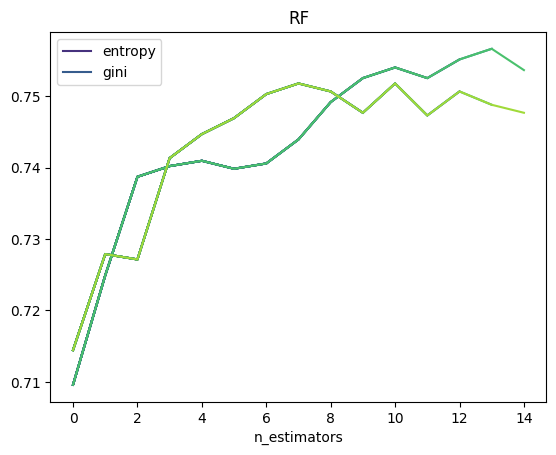

In [61]:
x = range(10, 151, 10)
y = ['entropy', 'gini']
z = []

for i in x:
  z.append([])
  for j in y:
    dt = RandomForestClassifier(n_estimators=i, criterion=j, random_state=42)
    dt.fit(X_train1, y_train1)
    z[len(z) - 1].append(dt.score(X_test1, y_test1))
  plt.plot(z)

plt.xlabel('n_estimators')
plt.title('RF')
plt.legend(y)
plt.show()

In [62]:
arr = np.array(z)
idx = np.unravel_index(np.argmax(arr), arr.shape)

best_n_estimators = list(x)[idx[0]]
best_accuracy = list(y)[idx[1]]

print(best_n_estimators, best_accuracy)

140 entropy


The best performance for this dataset gave the random forest with DTs with 140 estimators and using entropy criterion.

As we see, gini and entropy criterion models are constantly switching with top places. At the end(~100 estimators) the performance has actually equaled, but then entropy has taken the lead.

140 estimators is reasonable - it doesn't use that much time, and gives the best performance results if ~0.76 accuracy.

## **Random Forest Regressor**

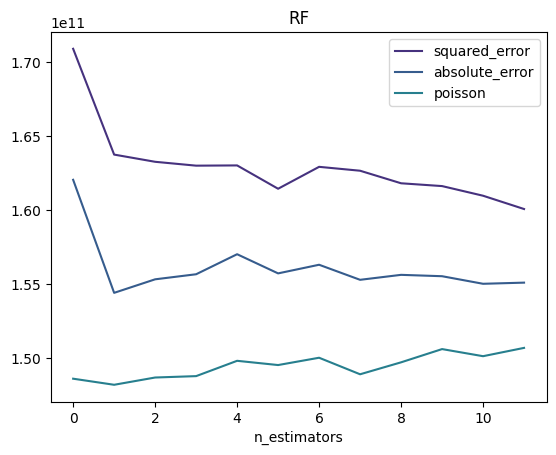

In [36]:
x = range(20, 250, 20)
y = ['squared_error', 'absolute_error', 'poisson']
z = []

for i in x:
  z.append([])
  for j in y:
    dt = RandomForestRegressor(n_estimators=i, criterion=j, random_state=42)
    dt.fit(X_train2, y_train2)
    y_pred  = dt.predict(X_test2)
    z[len(z) - 1].append(mean_squared_error(y_pred, y_test2))

plt.plot(z)

plt.xlabel('n_estimators')
plt.title('RF')
plt.legend(y)
plt.show()

In [37]:
arr = np.array(z)
idx = np.unravel_index(np.argmin(arr), arr.shape)

best_n_estimators = list(x)[idx[0]]
best_accuracy = list(y)[idx[1]]

print(best_n_estimators, best_accuracy)

40 poisson


Altogether, the poisson gave the best MSE score - even more than squated_error criterion and absolute_error.

While for the last two the MSE has dropped as the number of estimators has risen, poisson, whhich is good as my data is skewed(remember EDA), was mostly slightly increasing.

40 estimators with poisson is the best choice and actually it is better than a single DT.

## **SVC**

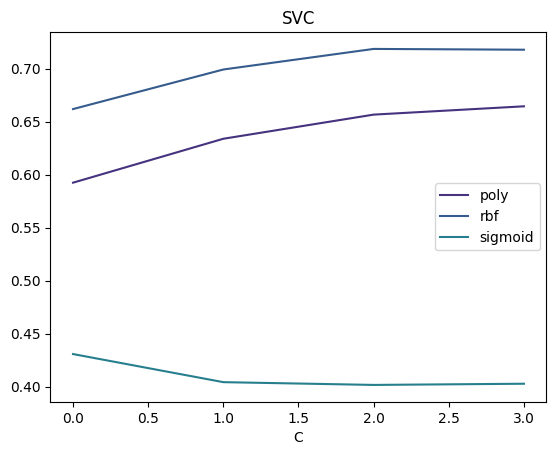

In [38]:
x = [0.1, 1, 10, 100]
y = ['poly', 'rbf', 'sigmoid']
z = []

for i in x:
  z.append([])
  for j in y:
    dt = SVC(C=i, kernel=j, random_state=42)
    dt.fit(X_train1, y_train1)
    z[len(z) - 1].append(dt.score(X_test1, y_test1))

plt.plot(z)

plt.xlabel('C')
plt.title('SVC')
plt.legend(y)
plt.show()

In [39]:
arr = np.array(z)
idx = np.unravel_index(np.argmax(arr), arr.shape)

best_C = list(x)[idx[0]]
best_kernel = list(y)[idx[1]]

print(best_C, best_kernel)

10 rbf


All in all, sigmoid SVC has earnt the lowest accuracy - it is expectable, as it is firstly designed for binary data(while we have 4 categories).

SVC with poly and rbf kernel have got the maximal accuracy, smoothly increasing as C increases. It means that it mostly likes when tehe groups are most accurately divided(instead of increasing the distance between samples)

C = 10 is not a really big value, so I'll go with it and the rbf kernel.

# **SVR**

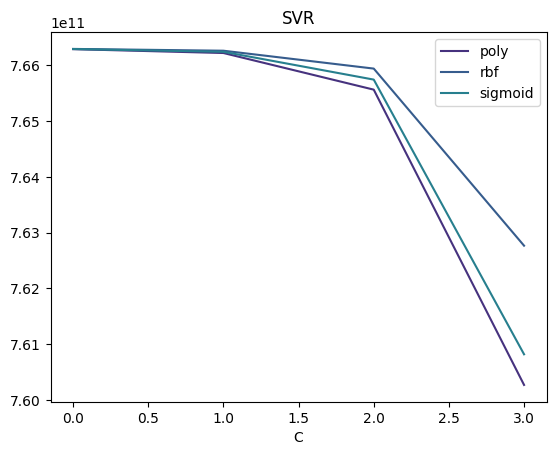

In [40]:
x = [0.1, 1, 10, 100]
y = ['poly', 'rbf', 'sigmoid']
z = []

for i in x:
  z.append([])
  for j in y:
    dt = SVR(C=i, kernel=j)
    dt.fit(X_train2, y_train2)
    y_pred  = dt.predict(X_test2)
    z[len(z) - 1].append(mean_squared_error(y_pred, y_test2))

plt.plot(z)

plt.xlabel('C')
plt.title('SVR')
plt.legend(y)
plt.show()

In [41]:
arr = np.array(z)
idx = np.unravel_index(np.argmin(arr), arr.shape)

best_c = list(x)[idx[0]]
best_accuracy = list(y)[idx[1]]

print(best_c, best_accuracy)

100 poly


SVR performs extremely bad on this dataset(the worst performance). In comparison with other models, which mostly rely on thresholds, it creates the fluctuations and is really bad.

Also, we see that as C increases, the MSE decreases - normal, as it loves when the values are separated harshly.

In [42]:
pd.DataFrame((i, j) for i, j in zip(y_pred, y_test2))

,0,1
0,"755,548.04","460,000.00"
1,"767,989.76","930,000.00"
2,"760,723.56","360,000.00"
3,"755,860.01","310,000.00"
4,"755,357.70","465,000.00"
...,...,...
309,"772,355.68","1,190,000.00"
310,"757,361.51","490,000.00"
311,"758,461.89","550,000.00"
312,"775,781.10","2,700,000.00"


## Some investigation on results

In [43]:
pd.Series(y_pred).describe()

,0
count,314.00
mean,"765,609.54"
std,"7,222.78"
min,"752,301.83"
25%,"758,635.13"
50%,"766,414.41"
75%,"771,734.79"
max,"778,736.15"


In [44]:
pd.Series(y_test2).describe()

,price
count,314.00
mean,"1,118,296.18"
std,"803,957.28"
min,"165,000.00"
25%,"561,250.00"
50%,"792,500.00"
75%,"1,493,750.00"
max,"3,700,000.00"


The SVR behaviour is too smooth, giving results in range 752k - 778k, while the true data lies between 165k and 3.700k.